In [92]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

### Read the input file and check the data dimension

In [93]:
german_credit = pd.read_csv("german_credit.csv")
print("Shape of the data : ",german_credit.shape)
print("Columns are : ",german_credit.columns)
german_credit.sample(5)

Shape of the data :  (1000, 21)
Columns are :  Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
143,1,< 0 DM,18,existing credits paid back duly till now,radio/television,2462,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",22,none,own,1,skilled employee / official,1,none,yes
679,0,no checking account,18,existing credits paid back duly till now,domestic appliances,1453,... < 100 DM,... < 1 year,3,female : divorced/separated/married,...,1,real estate,26,none,own,1,skilled employee / official,1,none,yes
276,0,no checking account,18,critical account/ other credits existing (not ...,domestic appliances,2404,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,"if not A121/A122 : car or other, not in attrib...",26,none,own,2,skilled employee / official,1,none,yes
620,0,0 <= ... < 200 DM,21,critical account/ other credits existing (not ...,business,3652,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,if not A121 : building society savings agreeme...,27,none,own,2,skilled employee / official,1,none,yes
448,0,>= 200 DM / salary assignments for at least 1 ...,12,existing credits paid back duly till now,radio/television,1424,unknown/ no savings account,.. >= 7 years,3,female : divorced/separated/married,...,4,real estate,55,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes


In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

(1000, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [163]:

X = german_credit.drop(['default'],axis=1)
y = german_credit['default']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
print('Train Data',X_train.shape,y_train.shape)
print('Test Data',X_test.shape,y_test.shape)

Train Data (500, 20) (500,)
Test Data (500, 20) (500,)


In [153]:
# Lets build a Ensemble model but need to modify the dataset first

Index(['account_check_status', 'duration_in_month', 'credit_history',
       'purpose', 'credit_amount', 'savings', 'present_emp_since',
       'installment_as_income_perc', 'personal_status_sex', 'other_debtors',
       'present_res_since', 'property', 'age', 'other_installment_plans',
       'housing', 'credits_this_bank', 'job', 'people_under_maintenance',
       'telephone', 'foreign_worker'],
      dtype='object')

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [175]:
# Print Shape of model data
gc1 = pd.get_dummies(german_credit)
print(gc1.shape)
gc1.sample(5)

(1000, 62)


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
898,0,15,2186,1,4,33,1,1,0,0,...,0,1,0,0,0,1,1,0,0,1
648,1,24,947,4,3,38,1,2,0,0,...,0,0,0,1,0,0,1,0,0,1
28,0,7,2415,3,2,34,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
759,1,12,691,4,3,35,2,1,0,1,...,1,0,0,1,0,0,1,0,0,1
148,0,36,5371,3,2,28,2,1,0,1,...,1,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [176]:
gc1.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


### Drop the original variables which are converted to dummy

In [181]:
cols = gc1.drop(['default'],axis=1).columns
gc2 = pd.DataFrame(StandardScaler().fit_transform(gc1.drop(['default'], axis=1)),columns=cols)


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [182]:
X = gc2
y = gc1['default']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
print('Train Data',X_train.shape,y_train.shape)
print('Test Data',X_test.shape,y_test.shape)

Train Data (500, 61) (500,)
Test Data (500, 61) (500,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfc = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfc.fit(X_train,y_train)
print(rfc)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [185]:
from sklearn.metrics import confusion_matrix
rpred = rfc.predict(X_test)
print("Accuracy of the Model:",metrics.accuracy_score(y_test,rpred))
conf_matrix = confusion_matrix(y_test,rpred)




Accuracy of the Model: 0.742


### Q6 Show the list of the features importance( 1 Marks)

In [188]:
feature_importances = pd.DataFrame(rfc.feature_importances_,index=X.columns)
print(feature_importances)

                                                           0
duration_in_month                                   0.073334
credit_amount                                       0.107943
installment_as_income_perc                          0.035440
present_res_since                                   0.035653
age                                                 0.074888
credits_this_bank                                   0.017417
people_under_maintenance                            0.012150
account_check_status_0 <= ... < 200 DM              0.018987
account_check_status_< 0 DM                         0.027893
account_check_status_>= 200 DM / salary assignm...  0.008880
account_check_status_no checking account            0.053424
credit_history_all credits at this bank paid ba...  0.009853
credit_history_critical account/ other credits ...  0.019638
credit_history_delay in paying off in the past      0.007678
credit_history_existing credits paid back duly ...  0.014631
credit_history_no credit

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [189]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [190]:
# Use below values
num_folds = 10
seed = 77
kfold = KFold(num_folds,True,random_state=seed)

In [191]:
#Validate the Random Forest model build above using k fold

In [192]:
c_val_score = cross_val_score(rfc,X=X_test,y=y_train)

In [193]:
#Calculate Mean score

In [194]:
c_val_score.mean()

0.686013515138398

In [195]:
# Calculate score standard deviation using std()

In [196]:
c_val_score.std()

0.006836421430340886

# Q8 Print the confusion matrix( 1 Marks)

In [197]:
print("Confustion Matrix :\n ",conf_matrix)

Confustion Matrix :
  [[333  16]
 [113  38]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [198]:
from sklearn.metrics import classification_report

In [199]:
print(classification_report(y_test, rpred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       349
           1       0.70      0.25      0.37       151

    accuracy                           0.74       500
   macro avg       0.73      0.60      0.60       500
weighted avg       0.73      0.74      0.70       500



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

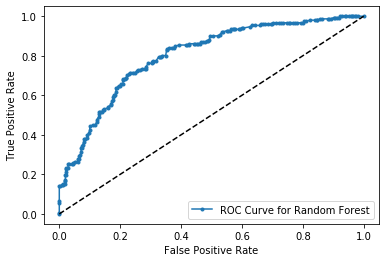

In [200]:
#Hint: Use roc_curve
rfc_prob = rfc.predict_proba(X_test)
rfc_prob = rfc_prob[:, 1]
rfc_auc = roc_auc_score(y_test, rfc_prob)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rfc_prob)

plt.clf()
plt.plot(lr_fpr, lr_tpr, marker='.', label='ROC Curve for Random Forest')
plt.plot([0,1],[0,1],'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
